In [1]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

import statsmodels.api as sm
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import pandas as pd
import numpy as np
import plotly.express as px


import statsmodels.api as sm
from statsmodels.tsa.filters.filtertools import convolution_filter
import statsmodels.graphics.tsaplots as tsplots
from statsmodels.tsa.seasonal import seasonal_decompose, STL, _extrapolate_trend
from statsmodels.tsa.forecasting.stl import STLForecast
from statsmodels.tsa.arima.model import ARIMA


In [2]:
# File is hourly productivity as a % change from the previous year

humidity = pd.read_csv('data/powerconsumption_humidity.csv', header=0, index_col=0)
temp = pd.read_csv('data/powerconsumption_temp.csv', header=0, index_col=0)

humidity.dtypes
#temp


Humidity    float64
dtype: object

In [91]:
humidity_additive = seasonal_decompose(humidity, model='additive',period=365)
temp_additive = seasonal_decompose(temp, model='additive',period=365)

humidity_multiplicative = seasonal_decompose(humidity, model='multiplicative',period=365)
temp_multiplicative = seasonal_decompose(temp, model='multiplicative',period=365)

# Humidity - Additive Model

Text(0, 0.5, '% Humidity')

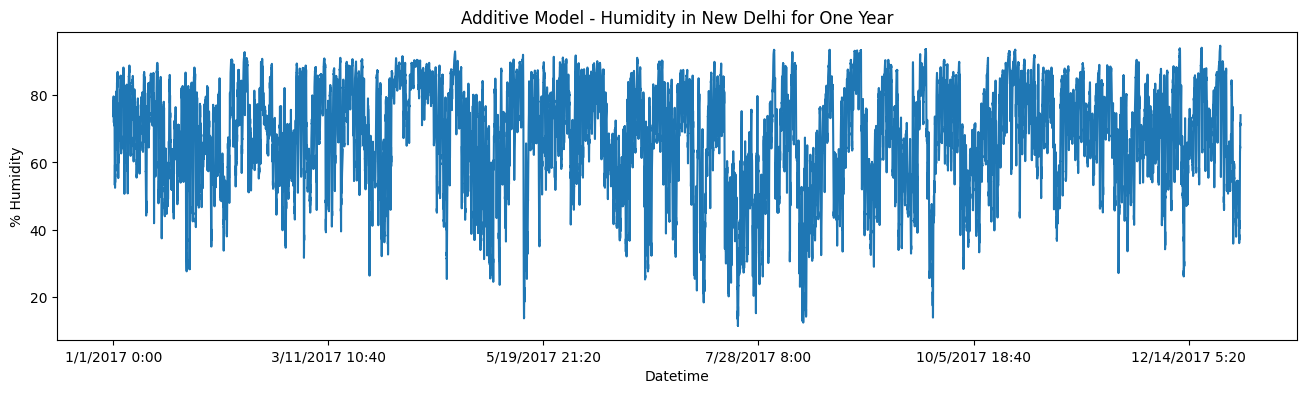

In [82]:
humidity_additive.observed.plot(figsize=(16,4))
plt.title('Additive Model - Humidity in New Delhi for One Year')
plt.ylabel('% Humidity')

Text(0, 0.5, '% Humidity')

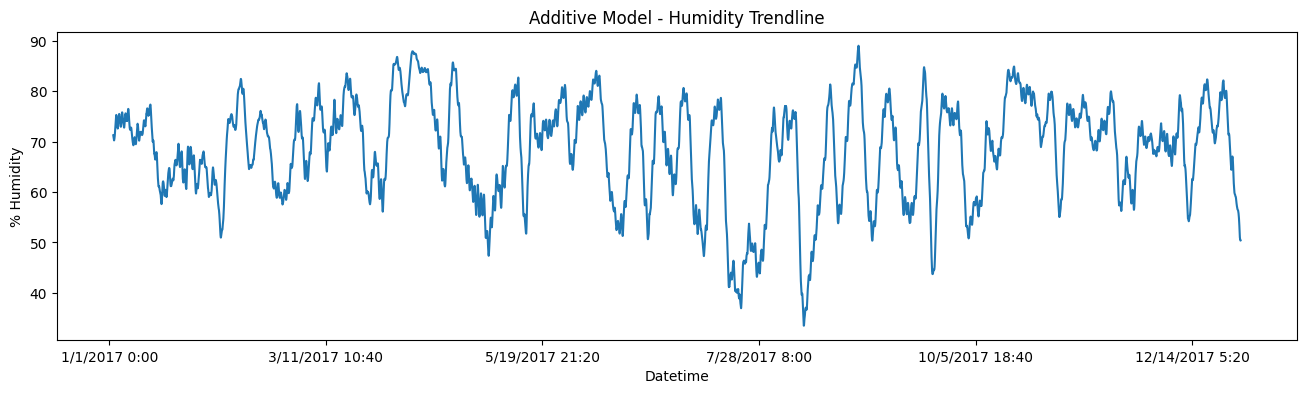

In [89]:
humidity_additive.trend.plot(figsize=(16,4))
plt.title('Additive Model - Humidity Trendline')
plt.ylabel('% Humidity')

Text(0, 0.5, '% Humidity')

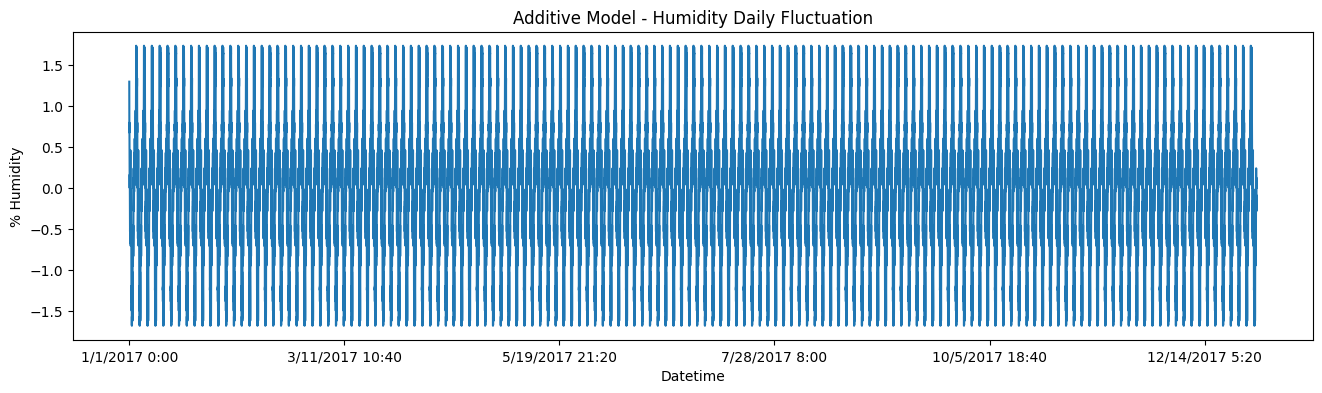

In [90]:
humidity_additive.seasonal.plot(figsize=(16,4))
plt.title('Additive Model - Humidity Daily Fluctuation')
plt.ylabel('% Humidity')

Text(0, 0.5, '% Humidity')

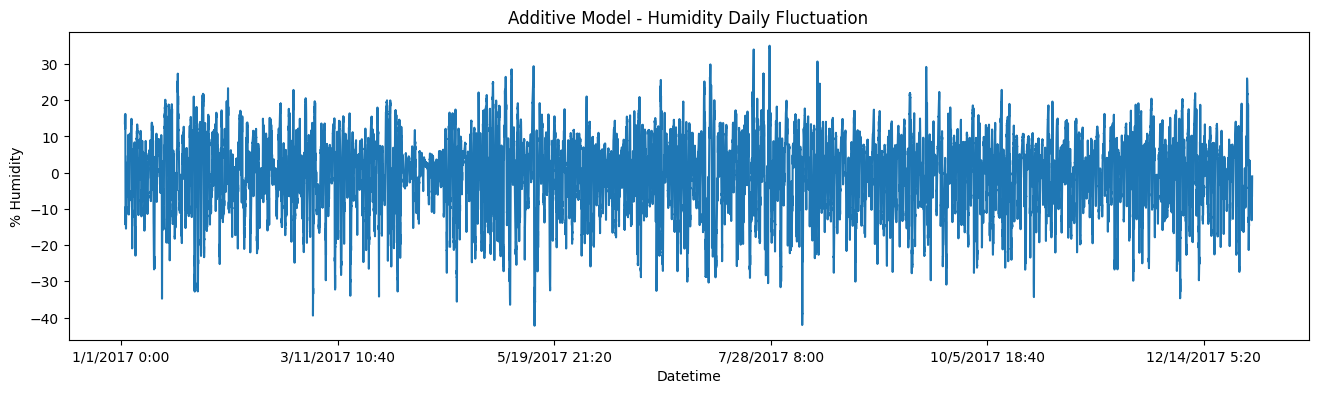

In [99]:
humidity_additive.resid.plot(figsize=(16,4))
plt.title('Additive Model - Humidity Daily Fluctuation')
plt.ylabel('% Humidity')

# Humidity - Multiplicative Model

Text(0, 0.5, '% Humidity')

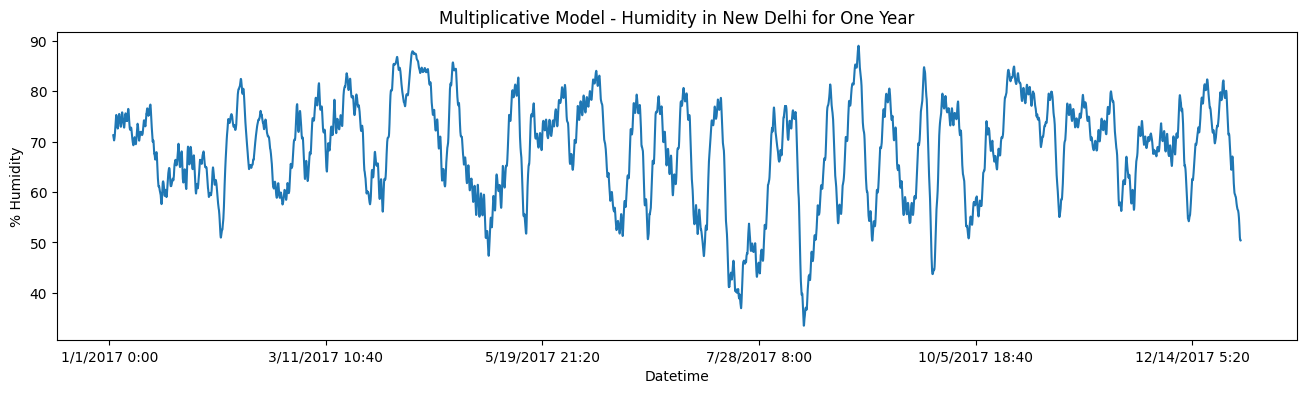

In [93]:
humidity_multiplicative.trend.plot(figsize=(16,4))
plt.title('Multiplicative Model - Humidity in New Delhi for One Year')
plt.ylabel('% Humidity')

Text(0, 0.5, '% Humidity')

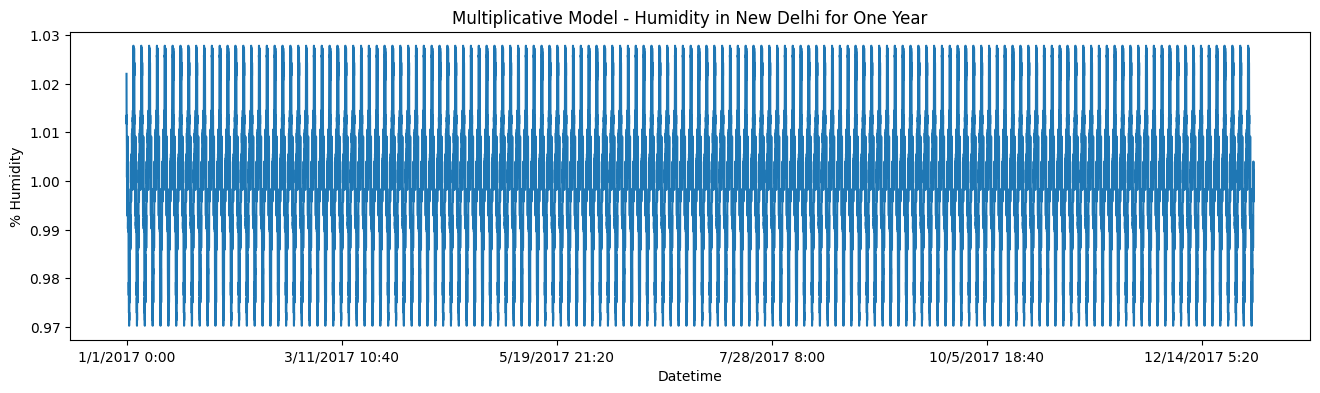

In [94]:
humidity_multiplicative.seasonal.plot(figsize=(16,4))
plt.title('Multiplicative Model - Humidity in New Delhi for One Year')
plt.ylabel('% Humidity')

Text(0, 0.5, '% Humidity')

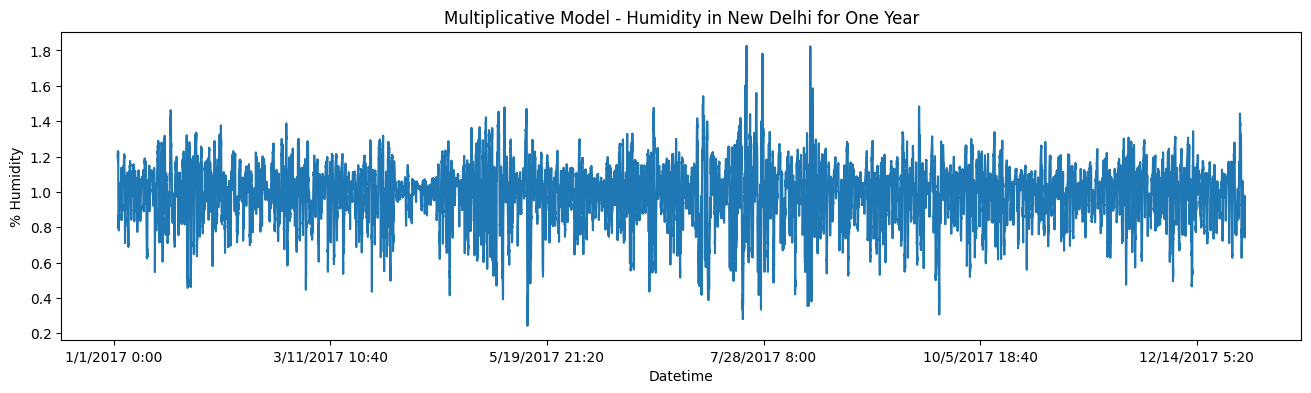

In [100]:
humidity_multiplicative.resid.plot(figsize=(16,4))
plt.title('Multiplicative Model - Humidity in New Delhi for One Year')
plt.ylabel('% Humidity')

# Temp - Additive Model

Text(0, 0.5, 'Degrees C')

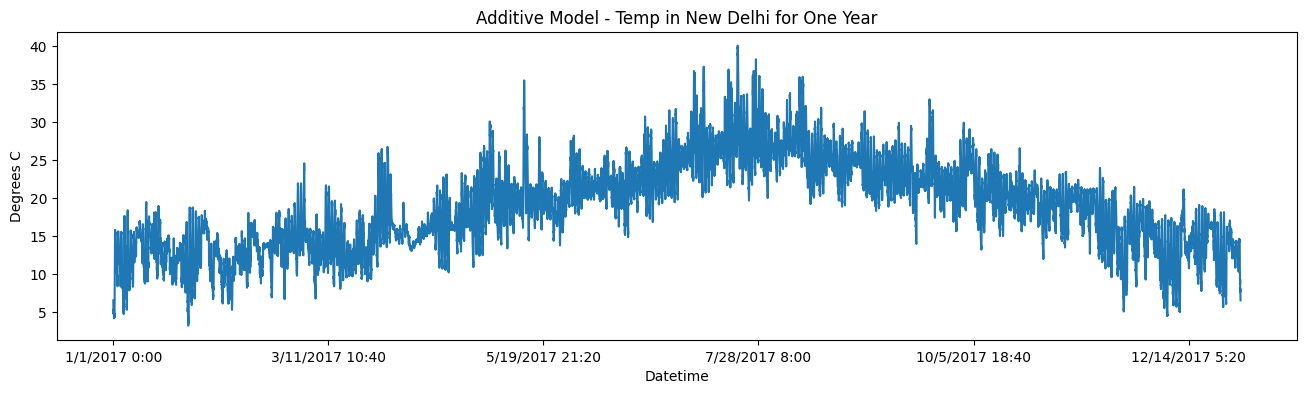

In [86]:
temp_additive.observed.plot(figsize=(16,4))
plt.title('Additive Model - Temp in New Delhi for One Year')
plt.ylabel('Degrees C')

Text(0, 0.5, 'Degrees C')

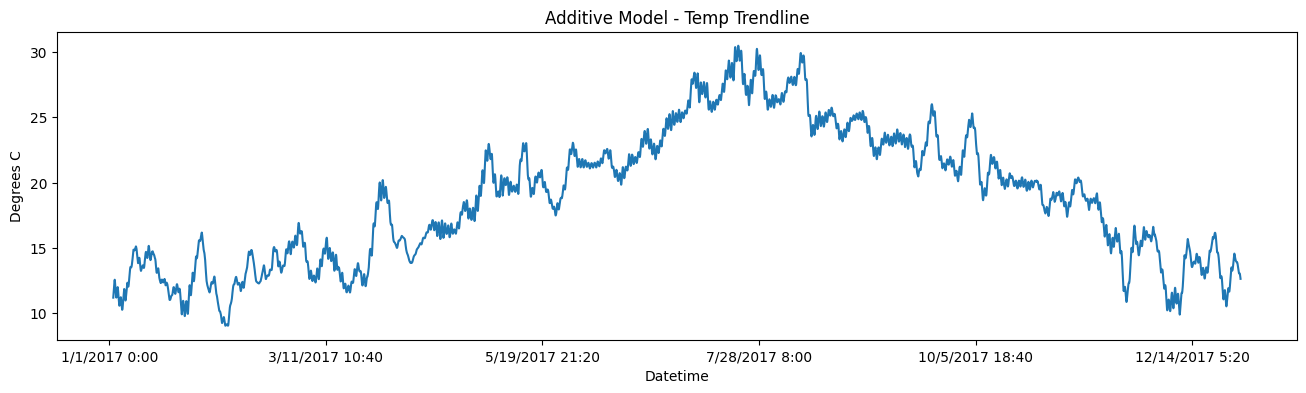

In [104]:
temp_additive.trend.plot(figsize=(16,4))
plt.title('Additive Model - Temp Trendline')
plt.ylabel('Degrees C')

Text(0, 0.5, 'Degrees C')

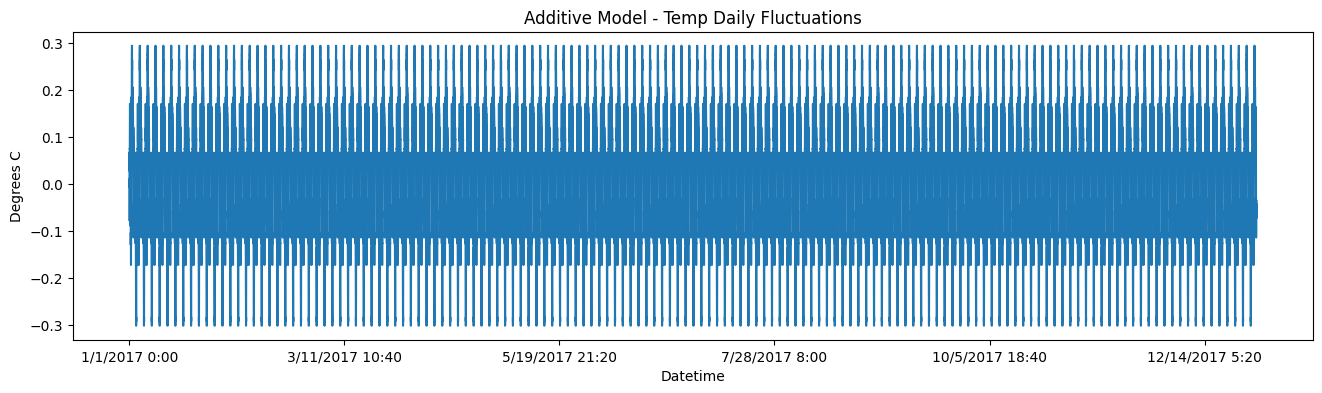

In [105]:
temp_additive.seasonal.plot(figsize=(16,4))
plt.title('Additive Model - Temp Daily Fluctuations')
plt.ylabel('Degrees C')

Text(0, 0.5, 'Degrees C')

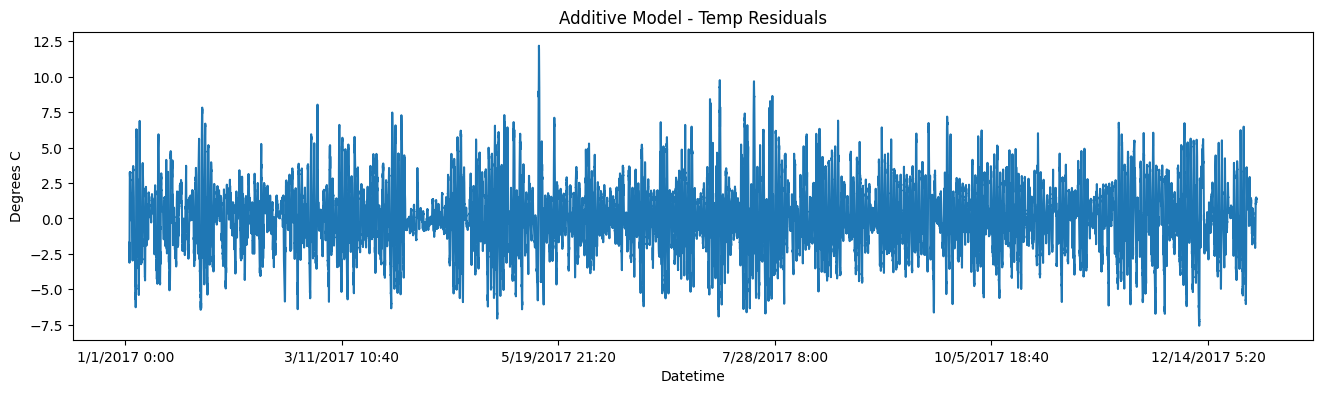

In [106]:
temp_additive.resid.plot(figsize=(16,4))
plt.title('Additive Model - Temp Residuals')
plt.ylabel('Degrees C')

# Temp - Multiplicative Model

Text(0, 0.5, '% Humidity')

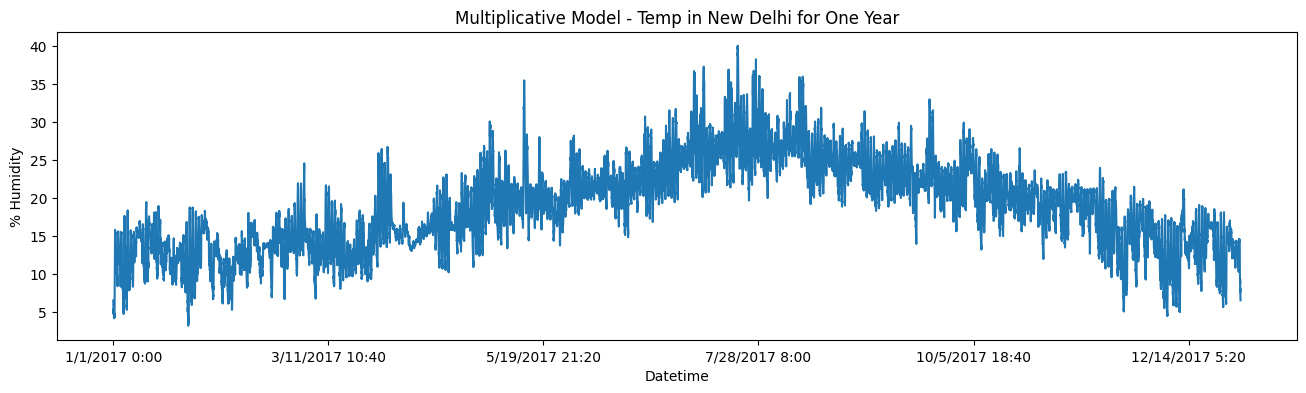

In [95]:
temp_multiplicative.observed.plot(figsize=(16,4))
plt.title('Multiplicative Model - Temp in New Delhi for One Year')
plt.ylabel('Degrees C')

Text(0, 0.5, 'Degrees C')

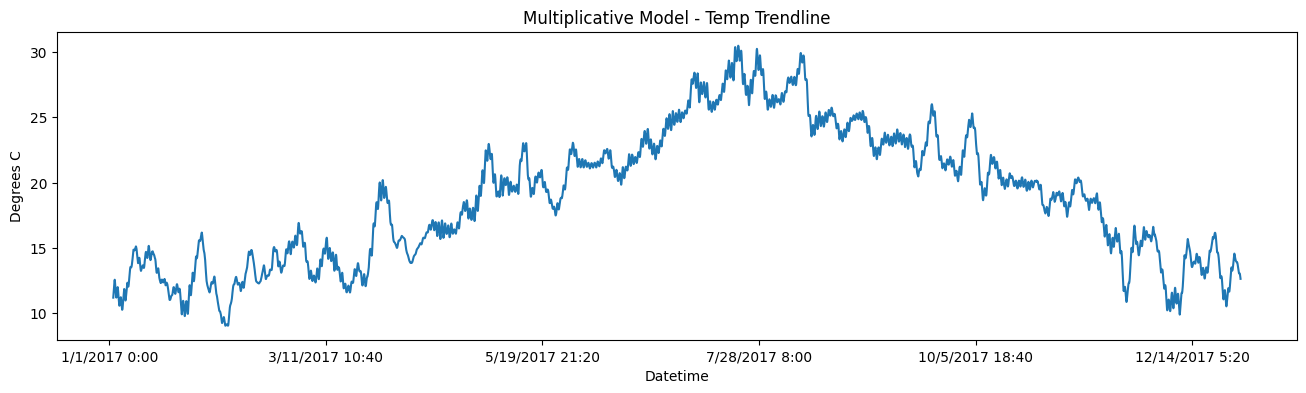

In [107]:
temp_multiplicative.trend.plot(figsize=(16,4))
plt.title('Multiplicative Model - Temp Trendline')
plt.ylabel('Degrees C')

Text(0, 0.5, 'Degrees C')

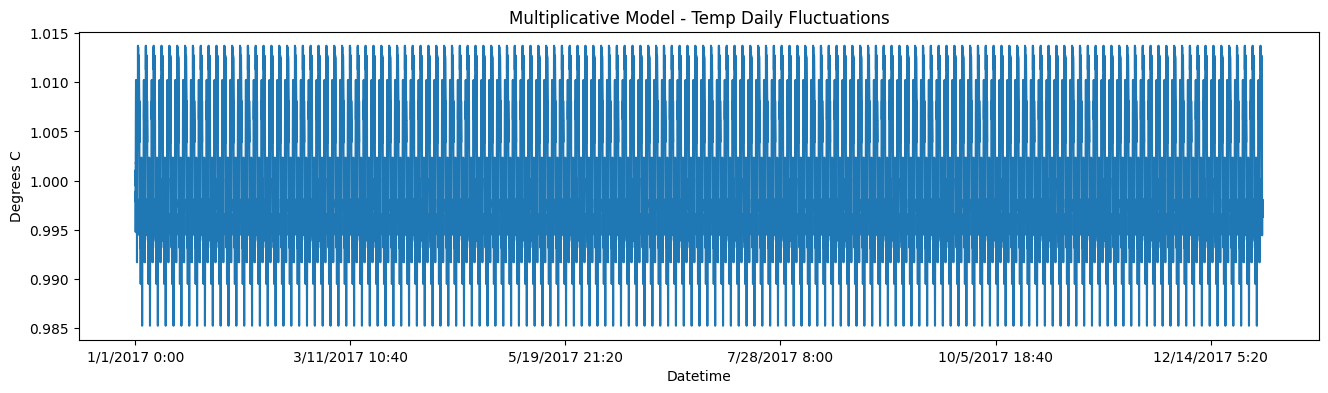

In [108]:
temp_multiplicative.seasonal.plot(figsize=(16,4))
plt.title('Multiplicative Model - Temp Daily Fluctuations')
plt.ylabel('Degrees C')

Text(0, 0.5, 'Degrees C')

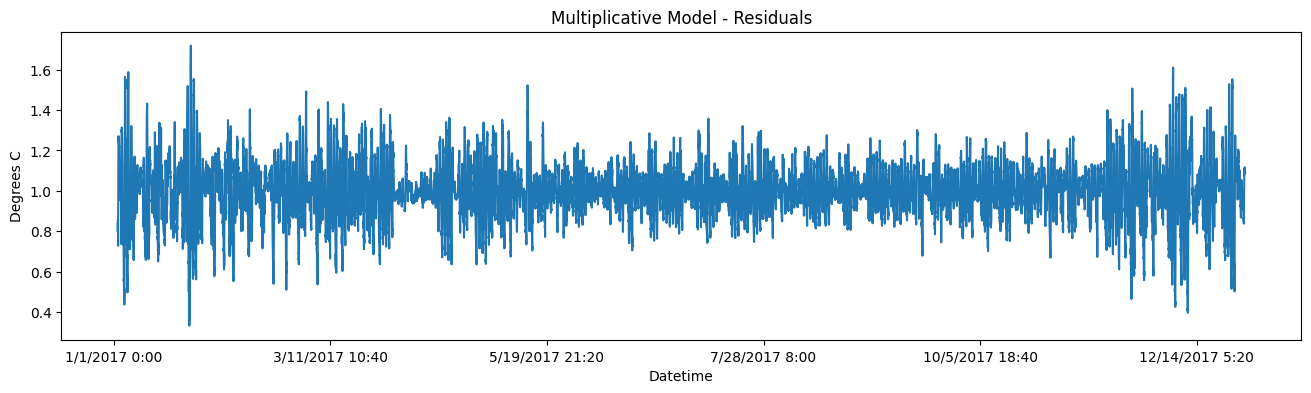

In [103]:
temp_multiplicative.resid.plot(figsize=(16,4))
plt.title('Multiplicative Model - Residuals')
plt.ylabel('Degrees C')

In [117]:
#instantiate
stlf = STLForecast(temp, ARIMA, model_kwargs={'order':(1, 1, 0), 'trend':"t"}, period=365)
#fit model using historical data
stlf_results = stlf.fit()
#produce forecast for future data
forecast = stlf_results.forecast(20)

c:\Users\sspillane\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 10min will be used.
  self._init_dates(dates, freq)
c:\Users\sspillane\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 10min will be used.
  self._init_dates(dates, freq)
c:\Users\sspillane\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 10min will be used.
  self._init_dates(dates, freq)


In [125]:
forecast[1]

C:\Users\sspillane\AppData\Local\Temp\ipykernel_6512\3502702834.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  forecast[1]


8.50727553994333

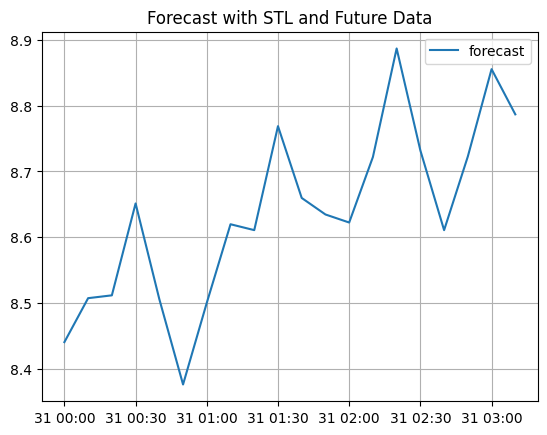

In [128]:
#plt.plot(temp[-20:], label = 'true future data')
plt.plot(forecast, label = 'forecast')
#plt.plot(y_hist['1993':], label = 'training data')
plt.legend()
plt.title('Forecast with STL and Future Data')
plt.grid();

In [130]:
pred_error = temp[-20:] - forecast
mae = np.abs(pred_error).mean()
rmse = np.sqrt((pred_error**2).mean())

In [131]:
mae

Temperature           NaN
2017-12-31 00:00:00   NaN
2017-12-31 00:10:00   NaN
2017-12-31 00:20:00   NaN
2017-12-31 00:30:00   NaN
2017-12-31 00:40:00   NaN
2017-12-31 00:50:00   NaN
2017-12-31 01:00:00   NaN
2017-12-31 01:10:00   NaN
2017-12-31 01:20:00   NaN
2017-12-31 01:30:00   NaN
2017-12-31 01:40:00   NaN
2017-12-31 01:50:00   NaN
2017-12-31 02:00:00   NaN
2017-12-31 02:10:00   NaN
2017-12-31 02:20:00   NaN
2017-12-31 02:30:00   NaN
2017-12-31 02:40:00   NaN
2017-12-31 02:50:00   NaN
2017-12-31 03:00:00   NaN
2017-12-31 03:10:00   NaN
dtype: float64